# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [2]:
%pip install iso3166

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [1]:
%pip install --upgrade plotly

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [315]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [103]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [217]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [9]:
df_data.shape

(4324, 9)

In [11]:
df_data.isna().values.any()

True

In [115]:
df_data.duplicated().values.any()

False

In [209]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [219]:
# Cleaning Step 1
df_dropped = df_data
df_dropped = df_dropped.dropna()
df_dropped.isna().values.any()

False

In [221]:
# Cleaning Step 2: Removing unnecessary columns and 
df_dropped.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df_data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)
df_data = df_data.fillna(0)
chars_to_remove = [',', '$']
for char in chars_to_remove:
    # Replace each character with an empty string
    df_dropped.Price = df_dropped.Price.astype(str).str.replace(char, "")
    df_data.Price = df_data.Price.astype(str).str.replace(char, "")
df_dropped.Price = pd.to_numeric(df_dropped.Price)
df_data.Price = pd.to_numeric(df_data.Price)

In [ ]:
# Cleaning Step 3: Reformatting Date column
df_data.Date = pd.to_datetime(df_data.Date, utc=True)
df_data.Date = df_data.Date.dt.strftime('%Y-%m-%d')
df_data.Date

0       2020-08-07
1       2020-08-06
2       2020-08-04
3       2020-07-30
4       2020-07-30
           ...    
4319    1958-02-05
4320    1958-02-01
4321    1957-12-06
4322    1957-11-03
4323    1957-10-04
Name: Date, Length: 4324, dtype: object

## Descriptive Statistics

In [155]:
# Number of unique space mission organizations
df_data['Organisation'].nunique()

56

In [157]:
df_dropped['Price'].min()

5.3

In [159]:
df_dropped['Price'].max()

5000.0

In [161]:
round(df_dropped['Price'].mean(), 2)

153.79

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [403]:
launches = df_data.Organisation.value_counts()
low_orgs = launches.loc[(launches <= 30)]
mid_orgs = launches.loc[(launches > 30) & (launches < 100)]
top_orgs = launches.loc[(launches >= 100)]

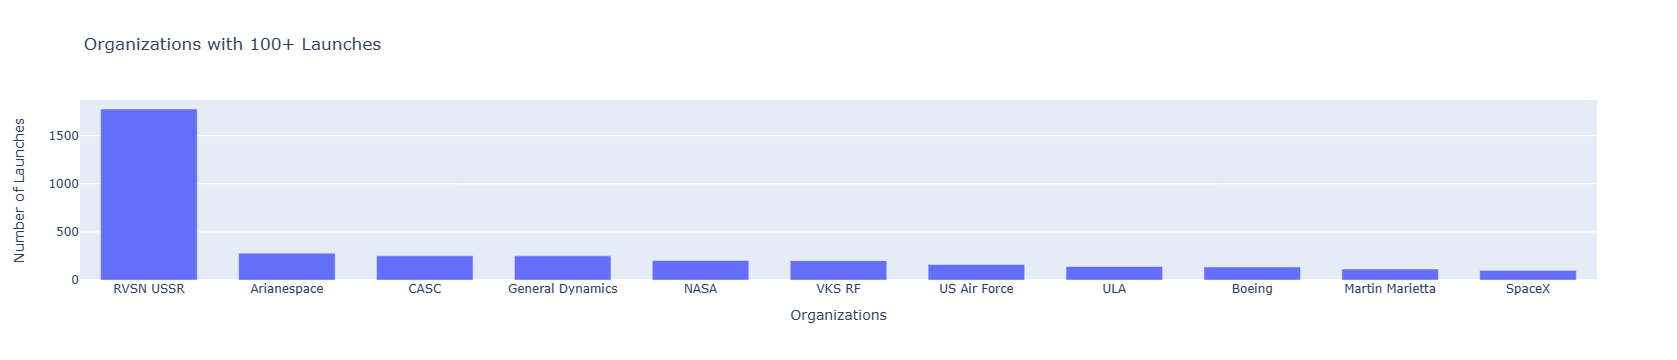

In [411]:
top_bar = px.bar(
    x = top_orgs.index,
    y = top_orgs.values,
    title = 'Organizations with 100+ Launches'
)

top_bar.update_traces(width=0.7)
top_bar.update_layout(
    xaxis_title='Organizations',
    yaxis_title='Number of Launches',
)

top_bar.show()

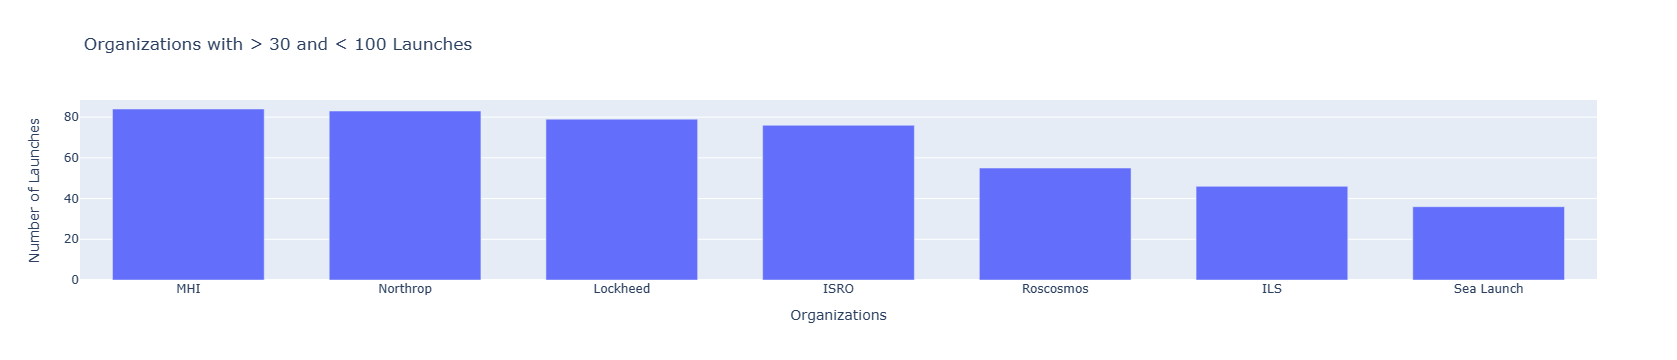

In [413]:
mid_bar = px.bar(
x = mid_orgs.index,
y = mid_orgs.values,
title = 'Organizations with > 30 and < 100 Launches'
)

mid_bar.update_traces(width=0.7)
mid_bar.update_layout(
    xaxis_title='Organizations',
    yaxis_title='Number of Launches'
)

mid_bar.show()

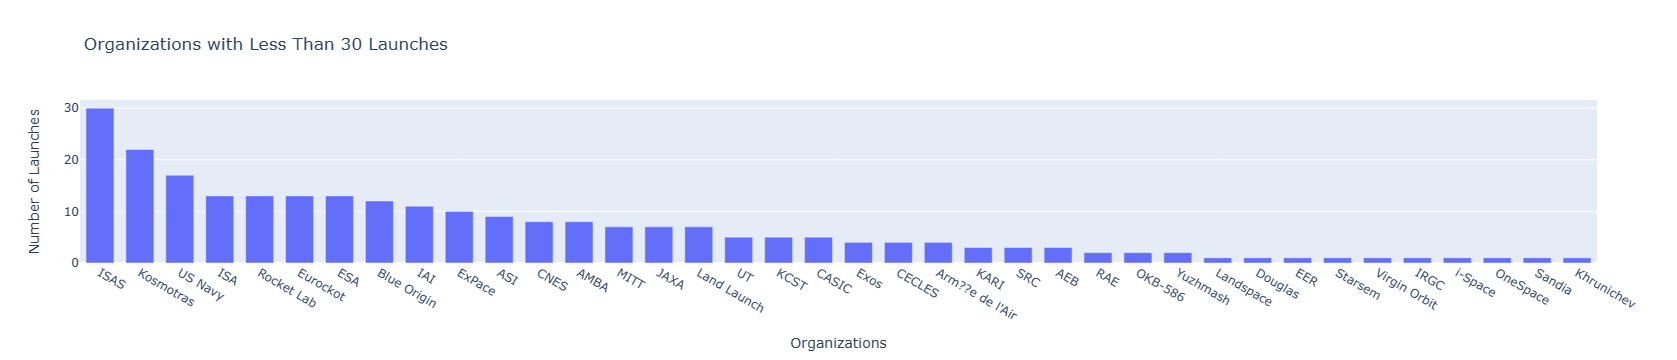

In [415]:
low_bar = px.bar(
x = low_orgs.index,
y = low_orgs.values,
title = 'Organizations with Less Than 30 Launches'
)

low_bar.update_traces(width=0.7)
low_bar.update_layout(
    xaxis_title='Organizations',
    yaxis_title='Number of Launches'
)

low_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

# Use a Choropleth Map to Show the Number of Failures by Country


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 